About the Dataset:

**id:** unique id for a news article

**title:** the title of a news article

**author:** author of the news article

**text:** the text of the article; could be incomplete

**label:** a label that marks whether the news article is real or fake



   *1: Fake news*
   
   *0: real News*

In [2]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
# printing the stopwords in engish
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

**Data Pre-Processing**

In [5]:
#Loading the dataset to a pandas dataframe
news_dataset=pd.read_csv('train.csv')

In [6]:
news_dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [7]:
news_dataset.shape

(20800, 5)

In [8]:
#Counting missing values
news_dataset.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [9]:
# Replacing the null value with empty string
news_dataset=news_dataset.fillna('')

In [10]:
news_dataset.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [11]:
# Merging the author's name and news title 
news_dataset['content']=news_dataset['author']+''+news_dataset['title']
print(news_dataset['content'])

0        Darrell LucusHouse Dem Aide: We Didn’t Even Se...
1        Daniel J. FlynnFLYNN: Hillary Clinton, Big Wom...
2        Consortiumnews.comWhy the Truth Might Get You ...
3        Jessica Purkiss15 Civilians Killed In Single U...
4        Howard PortnoyIranian woman jailed for fiction...
                               ...                        
20795    Jerome HudsonRapper T.I.: Trump a ’Poster Chil...
20796    Benjamin HoffmanN.F.L. Playoffs: Schedule, Mat...
20797    Michael J. de la Merced and Rachel AbramsMacy’...
20798    Alex AnsaryNATO, Russia To Hold Parallel Exerc...
20799               David SwansonWhat Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object


**Stemming:**  Stemming is the process of reducing a word to its root word

**Example:** 

actor, actress, acting --> act 

the main root word in this example is act 

In [12]:
port_stem=PorterStemmer()

In [13]:
def stemming(content):
    stemmed_content=re.sub('[^a-zA-z]',' ',content)
    stemmed_content=stemmed_content.lower()
    stemmed_content=stemmed_content.split()
    
    '''for word in stemmed_content:   This part iterates over each word in the stemmed_content list.
       if not word in stopwords.words('english')]:   This part checks if the word is not in the list of stopwords for the English language. 
If the word is not a stopword, it's included in stemmed_content'''
    
    stemmed_content=[port_stem.stem(word)
    for word in stemmed_content
    if not word in stopwords.words('english')]
    
    # This line combines the cleaned words into one string, ready to be returned.
    stemmed_content=' '.join(stemmed_content)
    return stemmed_content

In [14]:
news_dataset['content']=news_dataset['content'].apply(stemming)

In [15]:
print(news_dataset['content'])

0        darrel lucushous dem aid even see comey letter...
1        daniel j flynnflynn hillari clinton big woman ...
2                consortiumnew comwhi truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoyiranian woman jail fiction unpub...
                               ...                        
20795    jerom hudsonrapp trump poster child white supr...
20796    benjamin hoffmann f l playoff schedul matchup ...
20797    michael j de la merc rachel abramsmaci said re...
20798    alex ansarynato russia hold parallel exercis b...
20799                        david swansonwhat keep f aliv
Name: content, Length: 20800, dtype: object


In [16]:
X=news_dataset['content'].values
Y=news_dataset['label'].values

In [17]:
print(X)

['darrel lucushous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynnflynn hillari clinton big woman campu breitbart'
 'consortiumnew comwhi truth might get fire' ...
 'michael j de la merc rachel abramsmaci said receiv takeov approach hudson bay new york time'
 'alex ansarynato russia hold parallel exercis balkan'
 'david swansonwhat keep f aliv']


In [18]:
print(Y)

[1 0 1 ... 0 1 1]


In [19]:
X.shape

(20800,)

In [20]:
# Converting the textual data to numerical data
vectorizer=TfidfVectorizer()
vectorizer.fit(X)

X=vectorizer.transform(X)

In [21]:
print(X)

  (0, 26322)	0.28088379401596425
  (0, 22702)	0.2552336018069161
  (0, 14997)	0.43006226759639316
  (0, 14533)	0.29177259684200296
  (0, 12760)	0.24619727512767195
  (0, 8002)	0.23133661742488731
  (0, 6250)	0.2839932825877813
  (0, 5946)	0.35488202138141456
  (0, 4983)	0.2472595823572816
  (0, 4187)	0.3625320323150658
  (0, 552)	0.2694167078545385
  (1, 27949)	0.36911845953845024
  (1, 11292)	0.24166773097712638
  (1, 8753)	0.5258635625386451
  (1, 5893)	0.31810058109638056
  (1, 4744)	0.23338756776626793
  (1, 3833)	0.45980466668763476
  (1, 3255)	0.18652439327549428
  (1, 2596)	0.3562953366945267
  (2, 26217)	0.3665032495181434
  (2, 16336)	0.43295215406038445
  (2, 9435)	0.30743020569262086
  (2, 8548)	0.3411947414020896
  (2, 5217)	0.40440534260277944
  (2, 5098)	0.5511414848555652
  :	:
  (20797, 25758)	0.08220218573989037
  (20797, 25299)	0.3119640221826561
  (20797, 22063)	0.24902354987792552
  (20797, 20755)	0.2729578683228216
  (20797, 20470)	0.249994989010826
  (20797, 17481

**Splitting the dataset to training & testing data** 

X_train: This contains the features (input data) for training the model.


X_test: This contains the features (input data) for testing the model's performance.


Y_train: This contains the corresponding labels (output data) for training the model.


Y_test: This contains the corresponding labels (output data) for evaluating the model's performance.

In [22]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

**Training the model : Logistic Regression**

In [23]:
model=LogisticRegression()

In [24]:
model.fit(X_train,Y_train)

LogisticRegression()

**Evaluation**

*Accuracy Score*

In [25]:
# Accuracy Score on the training data
X_train_predict=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_predict,Y_train)

In [26]:
print('Accuracy Score of the Training Data :',training_data_accuracy)

Accuracy Score of the Training Data : 0.9717548076923077


In [27]:
# Accuracy Score on the testing data
X_test_predict=model.predict(X_test)
testing_data_accuracy=accuracy_score(X_test_predict,Y_test)

In [28]:
print('Accuracy Score of the Testing Data :',testing_data_accuracy)

Accuracy Score of the Testing Data : 0.9552884615384616


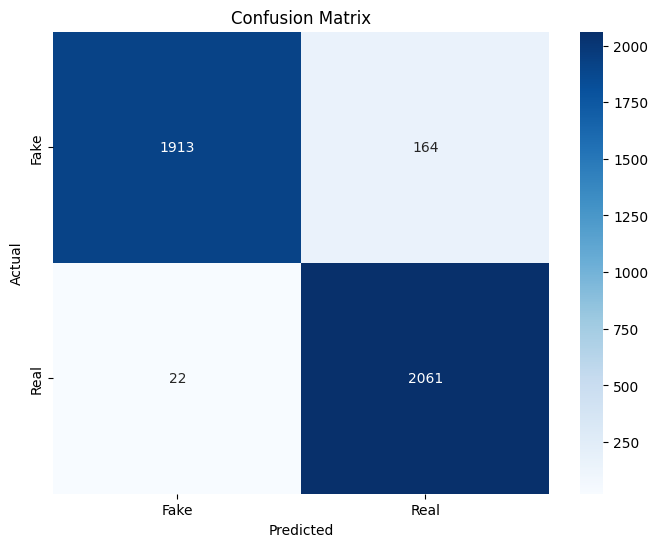

In [29]:
# Calculate confusion matrix
cm = confusion_matrix(Y_test, X_test_predict)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


**Prediction**

In [30]:
X_new=X_test[44]

prediction=model.predict(X_new)
print(prediction)

if(prediction[0]==0):
    print("This news is Real")
else:
    print("This news is Fake")
    

[0]
This news is Real


In [31]:
print(Y_test[44])

0
